# What is ANCOVA?

**ANCOVA** is a blend of analysis of variance (ANOVA) and regression. It is similar to factorial ANOVA, in that it can tell you what additional information you can get by considering one independent variable (factor) at a time, without the influence of the others. It can be used as:

* An extension of multiple regression to compare multiple regression lines,
* An extension of analysis of variance.

Although ANCOVA is usually used when there are differences between your baseline groups (Senn, 1994; Overall, 1993), it can also be used in pretest/posttest analysis when regression to the mean affects your posttest measurement (Bonate, 2000). The technique is also common in non-experimental research (e.g. surveys) and for quasi-experiments (when study participants can’t be assigned randomly). However, this particular application of ANCOVA is not always recommended (Vogt, 1999).

# Multiple Regression Analysis

**Multiple regression** analysis is used to see if there is a statistically significant relationship between sets of variables. It’s used to find trends in those sets of data.

Multiple regression analysis is almost the same as simple linear regression. The only difference between simple linear regression and multiple regression is in the number of predictors (“x” variables) used in the regression.

* Simple regression analysis uses a single x variable for each dependent “y” variable. For example: (x1, Y1).
* Multiple regression uses multiple “x” variables for each independent variable: (x1)1, (x2)1, (x3)1, Y1).

In one-variable linear regression, you would input one dependent variable (i.e. “sales”) against an independent variable (i.e. “profit”). But you might be interested in how different types of sales effect the regression. You could set your X1 as one type of sales, your X2 as another type of sales and so on.

**Extension of Multiple Regression**

When used as an extension of multiple regression, ANCOVA can test all of the regression lines to see which have different Y intercepts as long as the slopes for all lines are equal.

Like regression analysis, ANCOVA enables you to look at how an independent variable acts on a dependent variable. ANCOVA removes any effect of covariates, which are variables you don’t want to study. For example, you might want to study how different levels of teaching skills affect student performance in math; It may not be possible to randomly assign students to classrooms. You’ll need to account for systematic differences between the students in different classes (e.g. different initial levels of math skills between gifted and mainstream students).

**Example**

You might want to find out if a new drug works for depression. The study has three treatment groups and one control group. A regular ANOVA can tell you if the treatment works. ANCOVA can control for other factors that might influence the outcome. For example: family life, job status, or drug use.

**Extension of ANOVA**

As an extension of ANOVA, ANCOVA can be used in two ways (Leech et. al, 2005):

1. To control for covariates (typically continuous or variables on a particular scale) that aren’t the main focus of your study.
2. To study combinations of categorical and continuous variables, or variables on a scale as predictors. In this case, the covariate is a variable of interest (as opposed to one you want to control for).

**Within-Group Variance**

**ANCOVA** can explain within-group variance. It takes the unexplained variances from the ANOVA test and tries to explain them with confounding variables (or other covariates). You can use multiple possible covariates. However, more you enter, the fewer degrees of freedom you’ll have. Entering a weak covariate isn’t a good idea as it will reduce the statistical power. The lower the power, the less likely you’ll be able to rely on the results from your test. Strong covariates have the opposite effect: it can increase the power of your test.

<img src="https://www.statisticshowto.com/wp-content/uploads/2015/05/ancova.jpg">

# Assumptions for ANCOVA

Assumptions are basically the same as the ANOVA assumptions. Check that the following are true before running the test:

1. Independent variables (minimum of two) should be categorical variables.
2. The dependent variable and covariate should be continuous variables (measured on an interval scale or ratio scale.)
3. Make sure observations are independent. In other words, don’t put people into more than one group.

Software can usually check the following assumptions.

1. Normality: the dependent variable should be roughly normal for each of category of independent variables.
2. Data should show homogeneity of variance.
3. The covariate and dependent variable (at each level of independent variable) should be linearly related.
4. Your data should be homoscedastic of Y for each value of X.
5. The covariate and the independent variable shouldn’t interact. In other words, there should be homogeneity of regression slopes.

# Multiple regression with categorical independent variables or factors: Analysis of covariance (ANCOVA)

Analysis of covariance (ANCOVA) is a linear model that blends ANOVA and linear regression. ANCOVA evaluates whether population means of a dependent variable (DV) are equal across levels of a categorical independent variable (IV) often called a treatment, while statistically controlling for the effects of other quantitative or continuous variables that are not of primary interest, known as covariates (CV).

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

try:
    df = pd.read_csv("../datasets/salary_table.csv")
except:
    url = 'https://github.com/duchesnay/pystatsml/raw/master/datasets/salary_table.csv'
    df = pd.read_csv(url)

print(df.head())

   salary  experience education management
0   13876           1  Bachelor          Y
1   11608           1      Ph.D          N
2   18701           1      Ph.D          Y
3   11283           1    Master          N
4   11767           1      Ph.D          N


In [2]:
sns.__version__

'0.11.1'

Normality test p-value 0.04374


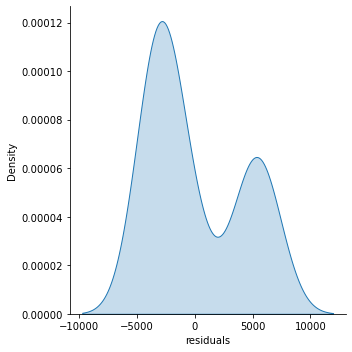

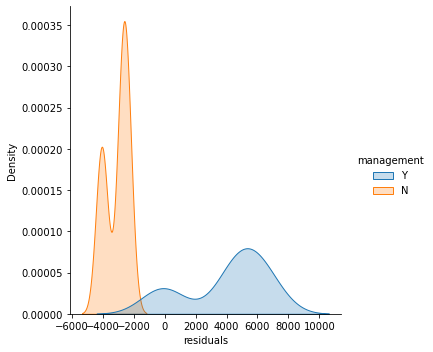

In [3]:
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms

lm = smf.ols('salary ~ experience', df).fit()
df["residuals"] = lm.resid

print("Normality test p-value %.5f" % sms.jarque_bera(lm.resid)[1])

ax = sns.displot(df, x='residuals', kind="kde", fill=True)
ax = sns.displot(df, x='residuals', kind="kde", hue='management', fill=True)

Normality assumption of the residuals can be rejected (p-value < 0.05). There is an efect of the "management" factor, take it into account.

**One-way AN(C)OVA**

* ANOVA: one categorical independent variable, i.e. one factor.

* ANCOVA: ANOVA with some covariates.

                  sum_sq    df           F        PR(>F)
management  5.755739e+08   1.0  183.593466  4.054116e-17
experience  3.334992e+08   1.0  106.377768  3.349662e-13
Residual    1.348070e+08  43.0         NaN           NaN
Normality test p-value 0.004


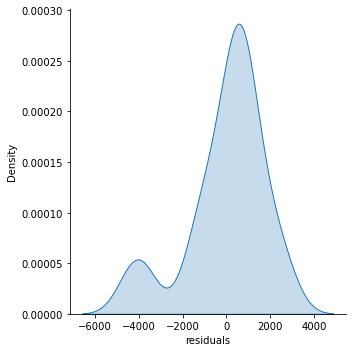

In [4]:
import statsmodels.api as sm
oneway = smf.ols('salary ~ management + experience', df).fit()
df["residuals"] = oneway.resid
sns.displot(df, x='residuals', kind="kde", fill=True)
print(sm.stats.anova_lm(oneway, typ=2))
print("Normality test p-value %.3f" % sms.jarque_bera(oneway.resid)[1])

Distribution of residuals is still not normal but closer to normality. Both management and experience are significantly associated with salary.

**Two-way AN(C)OVA**

Ancova with two categorical independent variables, i.e. two factors.

                  sum_sq    df           F        PR(>F)
education   9.152624e+07   2.0   43.351589  7.672450e-11
management  5.075724e+08   1.0  480.825394  2.901444e-24
experience  3.380979e+08   1.0  320.281524  5.546313e-21
Residual    4.328072e+07  41.0         NaN           NaN
Normality test p-value 0.506


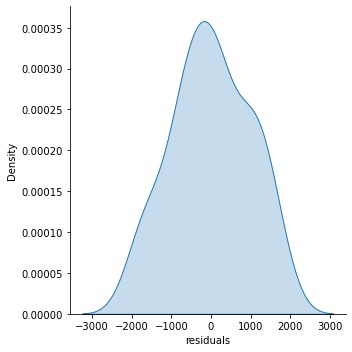

In [5]:
twoway = smf.ols('salary ~ education + management + experience', df).fit()

df["residuals"] = twoway.resid
sns.displot(df, x='residuals', kind="kde", fill=True)
print(sm.stats.anova_lm(twoway, typ=2))

print("Normality test p-value %.3f" % sms.jarque_bera(twoway.resid)[1])

Normality assumtion cannot be rejected. Assume it. Education, management and experience are significantly associated with salary.

**Comparing two nested models**

oneway is nested within twoway. Comparing two nested models tells us if the additional predictors (i.e. education) of the full model significantly decrease the residuals. Such comparison can be done using an $F$-test on residuals:

In [6]:
print(twoway.compare_f_test(oneway))  # return F, pval, df

(43.35158945918111, 7.67244957049531e-11, 2.0)


twoway is significantly better than one way

In [7]:
print(twoway.model.data.param_names)
print(twoway.model.data.exog[:10, :])

['Intercept', 'education[T.Master]', 'education[T.Ph.D]', 'management[T.Y]', 'experience']
[[1. 0. 0. 1. 1.]
 [1. 0. 1. 0. 1.]
 [1. 0. 1. 1. 1.]
 [1. 1. 0. 0. 1.]
 [1. 0. 1. 0. 1.]
 [1. 1. 0. 1. 2.]
 [1. 1. 0. 0. 2.]
 [1. 0. 0. 0. 2.]
 [1. 0. 1. 0. 2.]
 [1. 1. 0. 0. 3.]]


**Contrasts and post-hoc tests**

Post hoc tests are an integral part of ANOVA. When you use ANOVA to test the equality of at least three group means, statistically significant results indicate that not all of the group means are equal. However, ANOVA results do not identify which particular differences between pairs of means are significant. Use post hoc tests to explore differences between multiple group means while controlling the experiment-wise error rate.

In [8]:
ttest_exp = twoway.t_test([0, 0, 0, 0, 1])
ttest_exp.pvalue, ttest_exp.tvalue
print(ttest_exp)

# Alternatively, you can specify the hypothesis tests using a string
twoway.t_test('experience')

# Post-hoc is salary of Master different salary of Ph.D? 
# ie. t-test salary of Master = salary of Ph.D.
print(twoway.t_test('education[T.Master] = education[T.Ph.D]'))

                             Test for Constraints                             
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
c0           546.1840     30.519     17.896      0.000     484.549     607.819
                             Test for Constraints                             
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
c0           147.8249    387.659      0.381      0.705    -635.069     930.719
